# **Importing Necessary Libraries**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Used with seaborn for plots
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier # model

# Loading the data

In [ ]:
train_data = pd.read_csv("/content/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test_data = pd.read_csv("/content/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Let's take a quick view at the data for quick insight

# **Conventional Analysis**

In [ ]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [ ]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


As seen above it seems more women survived than men, but its quite inaccurate to base our conclusion on a single column in our data

**Now Lets view and clean up the data to make it ready for the Machine Learning process**

# Data Preprocessing

In any Machine Learning process, Data Preprocessing is that step in which the data gets cleaned and transformed, to bring it to such a state that now the machine can easily parse it.

# **Data quality workflow overview**

The workflow is a sequence of steps aiming at producing high-quality data and taking into account all the criteria we’ve talked about.

**Inspection:** Detect unexpected, incorrect, and inconsistent data.

**Cleaning:** Fix or remove the anomalies discovered.

**Verifying:** After cleaning, the results are inspected to verify correctness.

**Reporting:** A report about the changes made and the quality of the currently stored data is recorded

# Data Cleaning

**What makes up Data quality?**

Validity The degree to which the data conform to defined business rules or constraints.

Accuracy The degree to which the data is close to the true values.

**Completeness:** The degree to which all required data is known.

**Consistency:** The degree to which the data is consistent, within the same data set or across multiple data sets.

**Uniformity:** The degree to which the data is specified using the same unit of measure.

>  1



***Now let's apply this to our Titanic datasets.***

Goal: Predict the survivors






In [ ]:
# Let's take a quick look at the train and test data

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<h4> Decription of variables names </h4>
<ul>
    <li>survived</li>
    <ul>
        <li>0: No</li>
        <li>1: Yes</li>
    </ul>
    <li>pclass: Ticket class-A proxy for socio-economic status</li>
        <ul>
             <li> 1:1st:Upper</li>
             <li> 2: 2nd: Middle</li>
             <li> 3: 3rd: Lower</li>
        </ul>
    <li>Age: Numerical value of age</li>
    <li>SibSp: Number of siblings or Spouses aboard the titanic</li>
    <li>Parch: Number of parents or Children abroad the titanic</li>
    <li>Ticket: Ticket number</li>
    <li>Cabin: Cabin number</li>
    <li> Embarked:Port of Embarkation</li>
        <ul>
            <li>C: Cherbourg</li>
            <li>Q: Queenstown</li>
            <li>S: Southampton</li>
        <ul>
</ul>

<br>
            <h6>Variable Notes</h6>
            <p>age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5</p>
            <p> sibsp: The dataset defines family relations in this way...</p>
            <p>Sibling = brother, sister, stepbrother, stepsister</p>
            <p>Spouse = husband, wife (mistresses and fiancés were ignored)</p>
            <p>parch: The dataset defines family relations in this way...</p>
            <p>Parent = mother, father</p>
            <p>Child = daughter, son, stepdaughter, stepson</p>
            <p>Some children travelled only with a nanny, therefore parch=0 for them.</p>

In [ ]:
# Getting the Descriptive Statistics of the data
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
y = train_data['Survived']
X = train_data.drop(columns='Survived', inplace=True)

In [ ]:
train_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
train_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<h5 id="deal_missing_values">Deal with missing data</h5>
<b>How to deal with missing data?</b>

<ol>
    <li>drop data(When missing data is equal or more than 40%)<br>
        a. drop the whole row<br>
        b. drop the whole column
    </li>
    <li>replace data(When missing data is less than 40%)<br>
        a. replace it by center tendency value (mean, median, mode)<br>
        b. replace it based on other functions
    </li>
</ol>

In [ ]:
#dropping the cabin feature
train_data.drop(columns='Cabin', inplace=True)
test_data.drop(columns='Cabin', inplace=True)

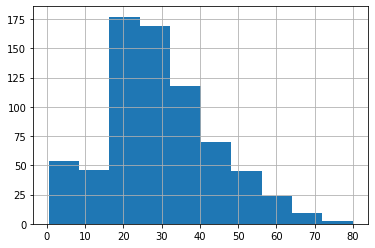

In [ ]:
# To replace the missing values in 'Age' with a value of center tendency, lets see the distribution
train_data['Age'].hist();

In [ ]:
# The distribution is fairly normal and hence its safe to replace with the mean
age_mean_val1 = train_data['Age'].mean()
age_mean_val2 = test_data['Age'].mean()

In [ ]:
train_data['Age'].replace(np.nan, age_mean_val1, inplace=True)
test_data['Age'].replace(np.nan, age_mean_val2, inplace=True)

Handling the missing values in the 'Embarked' features in the training set

In [ ]:
# Since its categorical and discrete in nature, we can use the mode (highest occurence to replace the missing values)
train_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Replacing the missing values in the 'Embarked' features with 'S'


In [ ]:
#Replacing the missing values in the 'Embarked' features with 'S'
train_data['Embarked'].replace(np.nan, 'S', inplace=True)
test_data['Embarked'].replace(np.nan, 'S', inplace=True)

handling the missing values in the 'Fare' feature in the test set

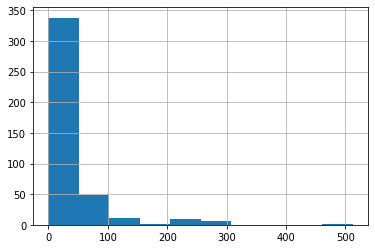

In [ ]:
# To replace the missing values in 'Age' with a value of center tendency, lets see the distribution
test_data['Fare'].hist()

In [ ]:
fare_median_val = test_data['Fare'].median()

In [ ]:
# Replacing the missing values in the 'Embarked' features with 'S'
test_data['Fare'].replace(np.nan, fare_median_val, inplace=True)

Cross checking the missing values below:

In [ ]:
train_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# **Dropping irrelevant features**

<h4> Since our goal for insights generation majorly is Machine Learning, which entails pattern recognition in the datasets and predictions, so features are too unique that they are irrelevant such as</h4>

<ol>
    <li>PassengerId</li>
    <li>Name* (But we can extract somethings from this as we will see in later section. So, we won't drop it now)</li>
    <li>Ticket</li>
</ol>

In [ ]:
cols_to_drop = ['PassengerId','Ticket']
train_data.drop(columns=cols_to_drop, inplace=True)
test_data.drop(columns=cols_to_drop, inplace=True)

# **Handling Categorical features**

<h3> Handling Categorical features </h3>

<h4> Categorical features are features which can take on values from a limited set of values.</h4>

<p>Machine learning models cannot work with categorical features the way they are. These features must be converted to numerical forms before they can be used. The process of converting the categorical features to numerical features is called encoding. </p>


<p>There are numerous type of encoding available, and the choice of which to use depends on the categorical type. So first, let's understand the different categorical types there is. </p>

<strong>Types of categorical features</strong>

<ol>
    <li>Ordinal Categorical Features : Features have a natural ordered category. That is, one class is higher than another. For example star ratings (1,2,3,4,5). Where class 5 is a higher rating than 4/3/2/1.</li>
    <li>Non-Ordinal Categorical Features: Features have no order. That is, no class is higher than the other.</li>
</ol>

<strong>What encoding scheme to use and when to use it</strong>
<ol>
    <li><strong>Manual Encoding of Ordinal Feature:</strong> If the classes in a categorical features are ordinal, and the unique values are small, then you can manually assign labels that have some form of ordering</li>
    <li><strong>Label Encoding:</strong> If you have a large number of classes in a categorical feature, you can use label encoding. Label encoding assigns a unique label (Integer number) to a specific class.</li>
    <li><strong>One-Hot Encoding:</strong> The One-Hot encoding uses binary values to represent classes. The one hot encoder creates a feature per category, and quickly becomes inefficient by creating a large number of feature as the number of classes in the categorical feature increases.</li>
    <li><strong>Hash Encoding:</strong> Hash encoding or feature hashing is a fast and space-efficient way of encoding features. It is very efficient for categorical features with large number of classes. Hash encoder works by applying a hash function to the features.</li>
    <li><strong> Target Encoding:</strong> In target encoding, we replace a categorical value with the mean of the target variable. That is, we calculate the average of the target value by a specific category. Target encoding helps to encode useful properties of the feature and can sometimes help improve classification models while sometimes it can lead to severe overfitting. </li>
</ol>

To do perform automated encoding, we will use an efficient library called categorical_encoders. This library offers numerous encoding schemes out of the box and has first hand support for Pandas DataFrame.

To install the library, you can use pip as follow:

<code>!pip install category_encoders</code>

In [ ]:
!pip install category_encoders

     |████████████████████████████████| 80 kB 3.9 MB/s 


In [ ]:
### Review data types
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Name      891 non-null    object 
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


<h4> It can be observed that...</h4>

- Name: Non ordinal(unique)
- Sex: Non ordinal
- Embarked: Non ordinal

So, a preferred encoding scheme would be one-hot enconding

In [ ]:
import category_encoders as ce

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
cats = ['Sex', 'Embarked']
one_hot_enc = ce.OneHotEncoder(cols=cats)

In [ ]:
### Fitting and transforming the datasets
train_data = one_hot_enc.fit_transform(train_data)
test_data = one_hot_enc.transform(test_data)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [ ]:
train_data.head()

,Pclass,Name,Sex_1,Sex_2,Age,SibSp,Parch,Fare,Embarked_1,Embarked_2,Embarked_3
0,3,"Braund, Mr. Owen Harris",1,0,22.0,1,0,7.2500,1,0,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,38.0,1,0,71.2833,0,1,0
2,3,"Heikkinen, Miss. Laina",0,1,26.0,0,0,7.9250,1,0,0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,35.0,1,0,53.1000,1,0,0
4,3,"Allen, Mr. William Henry",1,0,35.0,0,0,8.0500,1,0,0


In [ ]:
test_data.head()

,Pclass,Name,Sex_1,Sex_2,Age,SibSp,Parch,Fare,Embarked_1,Embarked_2,Embarked_3
0,3,"Kelly, Mr. James",1,0,34.5,0,0,7.8292,0,0,1
1,3,"Wilkes, Mrs. James (Ellen Needs)",0,1,47.0,1,0,7.0000,1,0,0
2,2,"Myles, Mr. Thomas Francis",1,0,62.0,0,0,9.6875,0,0,1
3,3,"Wirz, Mr. Albert",1,0,27.0,0,0,8.6625,1,0,0
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,1,22.0,1,1,12.2875,1,0,0


In [ ]:
# To avoid dummy trap, you have to drop one of the generated encoded class for parent feature
train_data.drop(columns=['Sex_2','Embarked_3'], inplace=True)
test_data.drop(columns=['Sex_2','Embarked_3'], inplace=True)

In [ ]:
train_data.head()

,Pclass,Name,Sex_1,Age,SibSp,Parch,Fare,Embarked_1,Embarked_2
0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,1,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,0,1
2,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,1,0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,1,0
4,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,1,0


In [ ]:
train_data.head()

,Pclass,Name,Sex_1,Age,SibSp,Parch,Fare,Embarked_1,Embarked_2
0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,1,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,0,1
2,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,1,0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,1,0
4,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,1,0


# **Feature Engineerng**

Feature engineering is the process of using domain knowledge to extract features from raw data via data mining techniques. These features can be used to improve the performance of machine learning algorithms.

In [ ]:
# Creating FamilySize feature
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1

In [ ]:
#Extarct title from name of the passenger
train_data['Title'] = train_data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
train_data = train_data.drop(columns='Name')

test_data['Title'] = test_data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
test_data = test_data.drop(columns='Name')

In [ ]:
train_data.head()

,Pclass,Sex_1,Age,SibSp,Parch,Fare,Embarked_1,Embarked_2,FamilySize,Title
0,3,1,22.0,1,0,7.2500,1,0,2,Mr
1,1,0,38.0,1,0,71.2833,0,1,2,Mrs
2,3,0,26.0,0,0,7.9250,1,0,1,Miss
3,1,0,35.0,1,0,53.1000,1,0,2,Mrs
4,3,1,35.0,0,0,8.0500,1,0,1,Mr


In [ ]:
test_data.head()

,Pclass,Sex_1,Age,SibSp,Parch,Fare,Embarked_1,Embarked_2,FamilySize,Title
0,3,1,34.5,0,0,7.8292,0,0,1,Mr
1,3,0,47.0,1,0,7.0000,1,0,2,Mrs
2,2,1,62.0,0,0,9.6875,0,0,1,Mr
3,3,1,27.0,0,0,8.6625,1,0,1,Mr
4,3,0,22.0,1,1,12.2875,1,0,3,Mrs


In [ ]:
train_data.Title.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Lady          1
Ms            1
Don           1
Capt          1
Sir           1
Mme           1
Jonkheer      1
Countess      1
Name: Title, dtype: int64

Grouping the Title

In [ ]:
# Categorizing the titles
train_data['Title'] = train_data['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Countess', 'Sir', 'Jonkheer', 'Lady', 'Capt', 'Don'], 'Others')
train_data['Title'] = train_data['Title'].replace('Ms', 'Miss')
train_data['Title'] = train_data['Title'].replace('Mme', 'Mrs')
train_data['Title'] = train_data['Title'].replace('Mlle', 'Miss')

test_data['Title'] = test_data['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Countess', 'Sir', 'Jonkheer', 'Lady', 'Capt', 'Don'], 'Others')
test_data['Title'] = test_data['Title'].replace('Ms', 'Miss')
test_data['Title'] = test_data['Title'].replace('Mme', 'Mrs')
test_data['Title'] = test_data['Title'].replace('Mlle', 'Miss')

In [ ]:
train_data.Title.value_counts()

Mr        517
Miss      185
Mrs       126
Master     40
Others     23
Name: Title, dtype: int64

Now Let's encode the new "Title" Categorical feature

In [ ]:
cats = ['Title']
one_hot_enc = ce.OneHotEncoder(cols=cats)

### Fitting and transforming the datasets
train_data = one_hot_enc.fit_transform(train_data)
test_data = one_hot_enc.transform(test_data)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [ ]:
#Again, to avoid dummy trap
train_data.drop(columns=['Title_5'], inplace=True)
test_data.drop(columns=['Title_5'], inplace=True)

In [ ]:
train_data.head()

,Pclass,Sex_1,Age,SibSp,Parch,Fare,Embarked_1,Embarked_2,FamilySize,Title_1,Title_2,Title_3,Title_4
0,3,1,22.0,1,0,7.2500,1,0,2,1,0,0,0
1,1,0,38.0,1,0,71.2833,0,1,2,0,1,0,0
2,3,0,26.0,0,0,7.9250,1,0,1,0,0,1,0
3,1,0,35.0,1,0,53.1000,1,0,2,0,1,0,0
4,3,1,35.0,0,0,8.0500,1,0,1,1,0,0,0


In [ ]:
test_data.head()

,Pclass,Sex_1,Age,SibSp,Parch,Fare,Embarked_1,Embarked_2,FamilySize,Title_1,Title_2,Title_3,Title_4
0,3,1,34.5,0,0,7.8292,0,0,1,1,0,0,0
1,3,0,47.0,1,0,7.0000,1,0,2,0,1,0,0
2,2,1,62.0,0,0,9.6875,0,0,1,1,0,0,0
3,3,1,27.0,0,0,8.6625,1,0,1,1,0,0,0
4,3,0,22.0,1,1,12.2875,1,0,3,0,1,0,0


# Feature Scaling

Feature Scaling is a technique to standardize the independent features(what we are using to predict) present in the data in a fixed range. If feature scaling is not done, then a machine learning algorithm tends to weigh greater values, higher and consider smaller values as the lower values, regardless of the unit of the values.

We have two common feature scaling techniques
1. Standardization
2. Normalization

<b>What is Standardization?</b>
<p>Standardization is the process of transforming data into a common format which allows the researcher to make the meaningful comparison.
</p>


<center> $$ X^i = \frac{X - X_\min}{X_\max - X_\min} $$ </center>



<b>What is normalization?</b>
<p>Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variance is 1, or scaling variable so the variable values range from 0 to 1
</p>

<center> $$ X^i = \frac{X-\mu}{\sigma} $$ </center>

Where:
$$ X^i $$ scaled  value of the feature
$$ X $$ initial value of the feature
$$ X_\min $$ maximum values of the feature
$$ X_\max $$ minimum values of the feature 
$$ \mu $$ mean of the feature values
$$ \sigma $$ standard deviation of the feature values
    

💡 Gradient Descent Based Algorithms like regression models and neural networks  and Distance-Based Algorithms like KNN, SVM and K-means requires the data to be scaled. As having features on a similar scale can help the gradient descent converge more quickly towards the minima and as distance based models uses distances between data points to determine their similarity. But Tree based models are fairly insensitive to the scale of the features. 

- Normalization is good to use when you know that the distribution of your data does not follow a Gaussian distribution. This can be useful in algorithms that do not assume any distribution of the data like K-Nearest Neighbors and Neural Networks.
- Standardization, on the other hand, can be helpful in cases where the data follows a Gaussian distribution. However, this does not have to be necessarily true. Also, unlike normalization, standardization does not have a bounding range. So, even if you have outliers in your data, they will not be affected by standardization.


<strong>Both approaches can be easily be implemented using sklearn preprocessing package<strong>

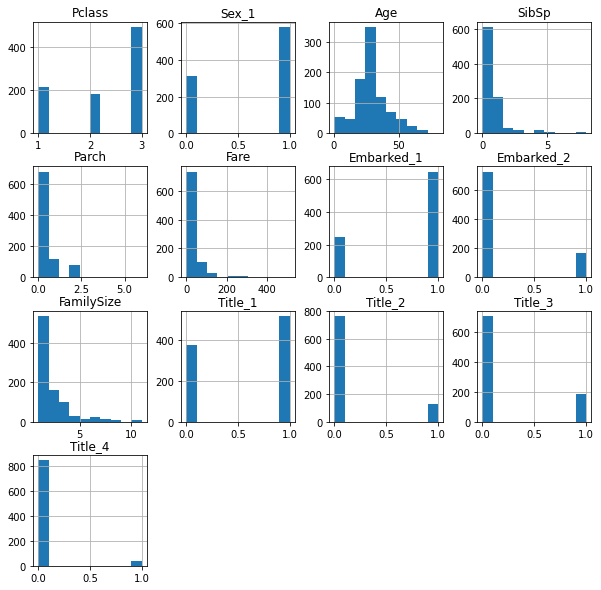

In [ ]:
train_data.hist(figsize=(10,10));

In [ ]:
train_data.head()

,Pclass,Sex_1,Age,SibSp,Parch,Fare,Embarked_1,Embarked_2,FamilySize,Title_1,Title_2,Title_3,Title_4
0,3,1,22.0,1,0,7.2500,1,0,2,1,0,0,0
1,1,0,38.0,1,0,71.2833,0,1,2,0,1,0,0
2,3,0,26.0,0,0,7.9250,1,0,1,0,0,1,0
3,1,0,35.0,1,0,53.1000,1,0,2,0,1,0,0
4,3,1,35.0,0,0,8.0500,1,0,1,1,0,0,0


In [ ]:
test_data.head()

,Pclass,Sex_1,Age,SibSp,Parch,Fare,Embarked_1,Embarked_2,FamilySize,Title_1,Title_2,Title_3,Title_4
0,3,1,34.5,0,0,7.8292,0,0,1,1,0,0,0
1,3,0,47.0,1,0,7.0000,1,0,2,0,1,0,0
2,2,1,62.0,0,0,9.6875,0,0,1,1,0,0,0
3,3,1,27.0,0,0,8.6625,1,0,1,1,0,0,0
4,3,0,22.0,1,1,12.2875,1,0,3,0,1,0,0


In [ ]:
#Install sklearn if it is your first time using it

#!pip install scikit-learn

#Lets normalize
from sklearn.preprocessing import MinMaxScaler

#In the case of Standardization
#from sklearn.preprocessing import StandardScalar

#Instatiating the object
norm = MinMaxScaler()

#Fitting and transforming the dataset
train_data = norm.fit_transform(train_data)
test_data = norm.transform(test_data)

<center><h4 style="color:red"><em> We are done with preprocessing our data! </em></h4><center>
<center><h5 style="color:green">Our machine learning algorithms are hungry for this clean and well formatted data<h5></center>

# **Modelling**

The model we will use for this classification exercise is the *Logistic Regression*


---
 **Logistic Regression:** 

This is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X.
Logistic Regression Assumptions


1.   Binary logistic regression requires the dependent variable to be binary.
2.   For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome.

3.   Only the meaningful variables should be included.
4.  The independent variables should be independent of each other. 

5.   That is, the model should have little or no multicollinearity.
6.  The independent variables are linearly related to the log odds.


7.   Logistic regression requires quite large sample sizes.


Keeping the above assumptions in mind, let’s look at our dataset.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# **Introduction to Classification and Regression Analysis**

Regression and classification are both supervised learning methods, which means that they use labelled training data to train their models and make predictions. Therefore, those two tasks are often categorized under the same group in machine learning.

The main difference between them is the output variable. While in regression, the output is numerical or continuous, in classification, the output is categorical or discrete.




## What is regression?

Regression analysis is defined in Wikipedia as:


In statistical modeling, regression analysis is a set of statistical processes for estimating the relationships between a dependent variable (often called the ‘outcome variable’) and one or more independent variables (often called ‘predictors’, ‘covariates’, or ‘features’).

The terminology you will often listen related to regression analysis is:

- Dependent variable or target variable: Variable to predict.
- Independent variable or predictor variable: Variables to estimate the dependent variable.
- Outlier: Observation that differs significantly from other observations. It should be avoided since it may hamper the result.
- Multicollinearity: Situation in which two or more independent variables are highly linearly related.
- Homoscedasticity or homogeneity of variance: Situation in which the error term is the same across all values of the independent variables.

Regression analysis is primarily used for two distinct purposes. First, it is widely used for prediction and forecasting, which overlaps with the field of machine learning. Second, it is also used to infer causal relationships between independent and dependent variables.

## Types of regression

There are various types of regressions which are used in data science and machine learning. Each type has its own importance on different scenarios, but at the core, all the regression methods analyze the effect of the independent variables on dependent variables. Here we mention some important types of regression:

1. Linear Regression
2. Polynomial Regression
3. Support Vector Regression
4. Decision Tree Regression
5. Random Forest Regression
6. Ridge Regression
7. Lasso Regression
8. Logistic Regression

### Choosing the correct regression model

The only way to know the best model is by trying out all of them and studying and comparing their individual performance on the data. Explaining each one of them in detail will be time expensive so we highlight a few.

**For this class, we will consider Linear regression**

Regression is the study of dependence — A Predictive modelling technique

1. It attempts to find the relationship between a DEPENDENT variable “Y” and an INDEPENDENT variable “X”.
(Note: Y should be a continuous variable while X can be categorical or continuous)
    
There are two types of linear regression — Simple Linear Regression and Multiple Linear Regression.
1. Simple linear regression will have one independent variable (predictor).
2. Multiple linear regression will have more than one independent variable (predictors).
   
In a nutshell — Linear Regression maps a continuous X to a continuous Y.